# Data loading and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
merged_df = pd.read_csv('/content/merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 66)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


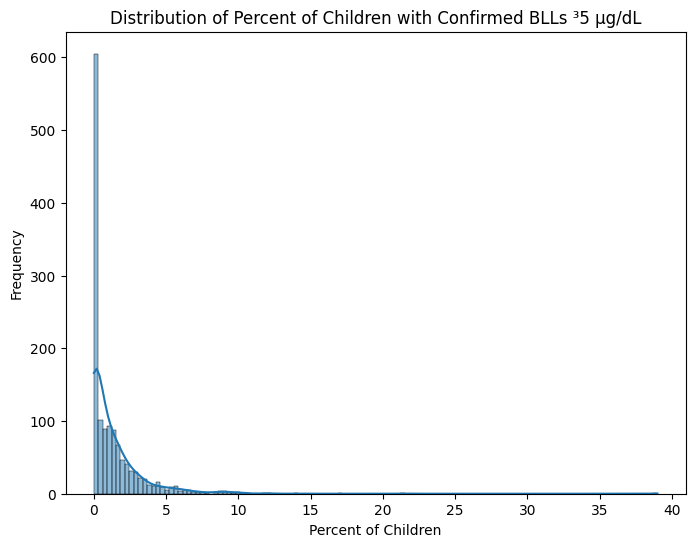

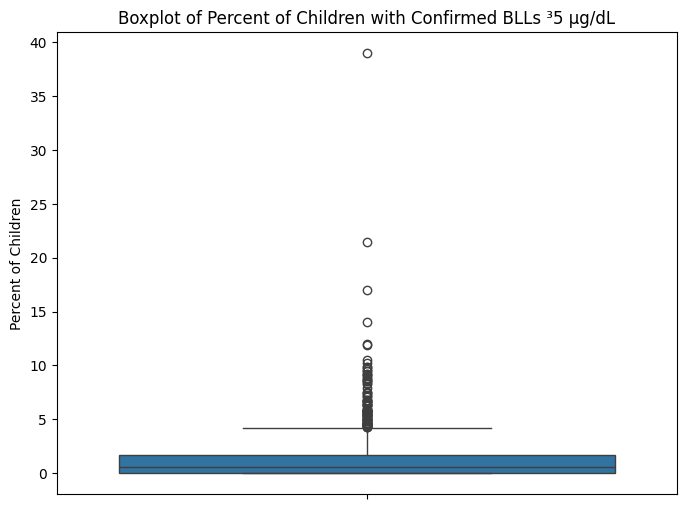

In [4]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# EDA

In [5]:
#Identify outliers in blood lead level
# Calculate quantiles and IQR
Q1 = merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].quantile(0.25)
Q3 = merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper, lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_df[(merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'] < lower_bound) |
                     (merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'] > upper_bound)]

# Display
print(outliers[['State', 'County', 'Percent of Children with Confirmed BLLs ³5 µg/dL']])
# Log transformation of the target variable
merged_df['Percent_BLL_log'] = np.log(merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'] + 1)  # Add 1 to avoid log(0)

     State    County  Percent of Children with Confirmed BLLs ³5 µg/dL
20      AL  CRENSHAW                                              6.30
54      AL      PIKE                                              7.90
97      CT   UNKNOWN                                              9.50
306     GA   TERRELL                                              6.70
338     IL     ADAMS                                              5.30
...    ...       ...                                               ...
1980    ND    GRIGGS                                              9.83
1981    ND    BARNES                                             11.89
1982    ND   SARGENT                                             14.06
1983    ND     ADAMS                                             21.45
2141    AZ  GREENLEE                                              4.70

[96 rows x 3 columns]


Built 1939 or earlier              0.460573
House Price$50,000 to $99,999      0.265707
Built 1940 to 1959                 0.256678
lat                                0.230253
House Price$100,000 to $149,999    0.228394
                                     ...   
House Price$300,000 to $499,999   -0.210821
ADHD Percentage (Current)         -0.236494
ADHD Percentage (Ever)            -0.239475
Built 2000 to 2019                -0.312355
Built 1980 to 1999                -0.385845
Name: Percent_BLL_log, Length: 63, dtype: float64


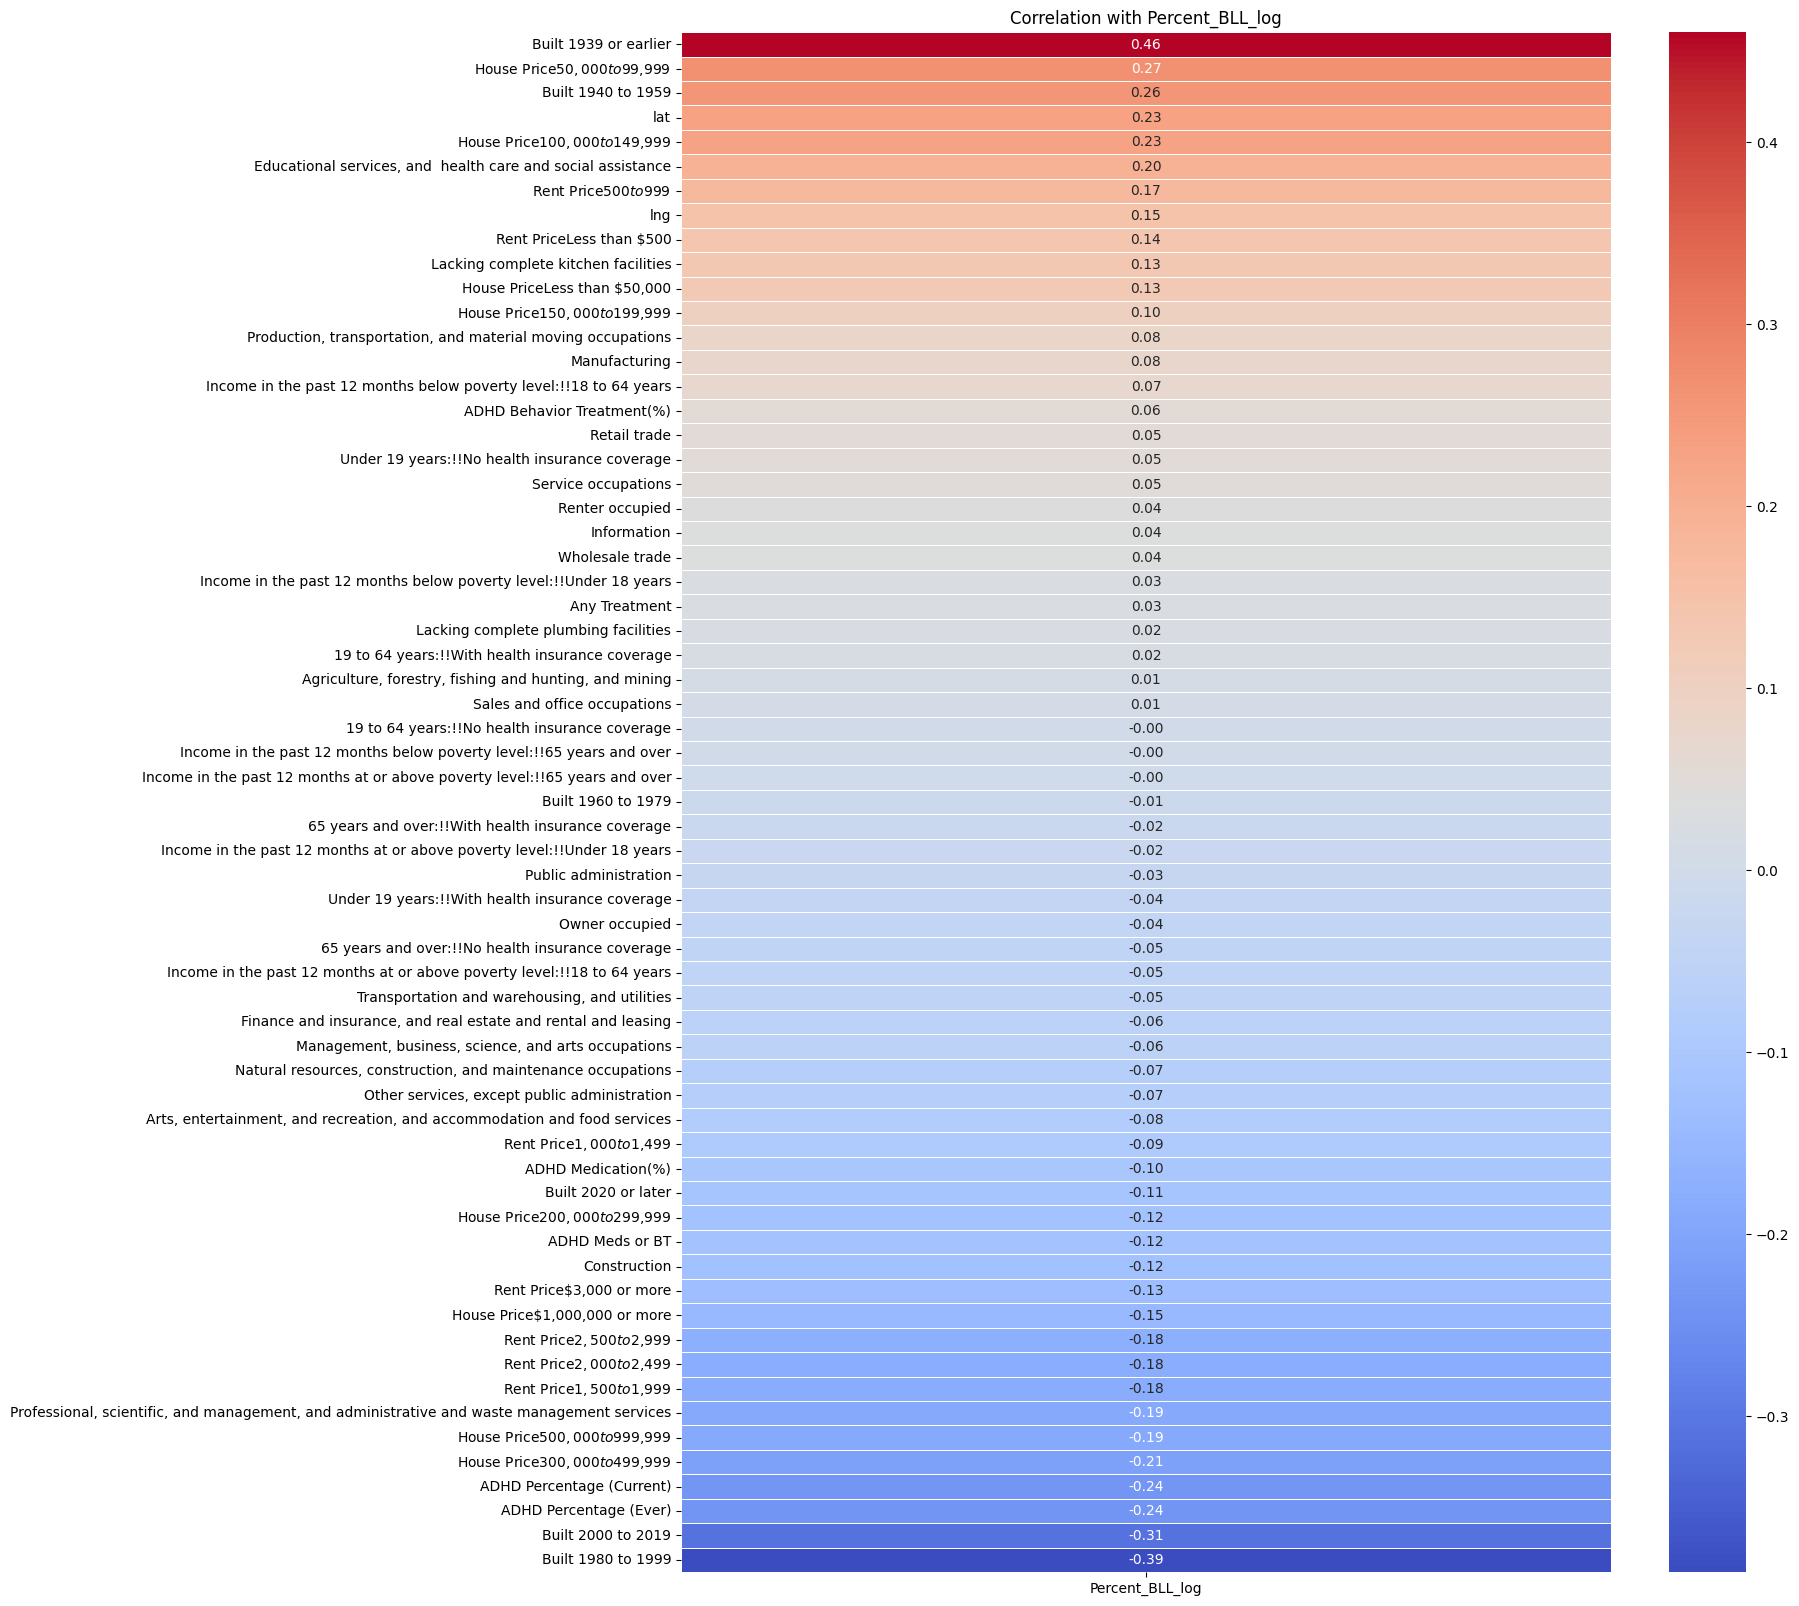

In [6]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ["State", "County", "Percent of Children with Confirmed BLLs ³5 µg/dL"]
filtered_merged_df = merged_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = filtered_merged_df.corr().drop('Percent_BLL_log')
# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent_BLL_log'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with {'Percent_BLL_log'}")
plt.show()

In [7]:
# Determine number of missing values
missing_percentage = merged_df[bll_column].isnull().sum() / len(merged_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.15%


# Data cleaning for features

In [8]:
# Identify columns with missing values, excluding specified columns
cols_with_missing = [col for col in merged_df.columns if merged_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL', 'Percent_BLL_log']]

print(cols_with_missing)

['Built 2020 or later', 'Built 2000 to 2019', 'Built 1980 to 1999', 'Built 1960 to 1979', 'Built 1940 to 1959', 'Built 1939 or earlier', 'Lacking complete plumbing facilities', 'Lacking complete kitchen facilities', 'House PriceLess than $50,000', 'House Price$50,000 to $99,999', 'House Price$100,000 to $149,999', 'House Price$150,000 to $199,999', 'House Price$200,000 to $299,999', 'House Price$300,000 to $499,999', 'House Price$500,000 to $999,999', 'House Price$1,000,000 or more', 'Rent PriceLess than $500', 'Rent Price$500 to $999', 'Rent Price$1,000 to $1,499', 'Rent Price$1,500 to $1,999', 'Rent Price$2,000 to $2,499', 'Rent Price$2,500 to $2,999', 'Rent Price$3,000 or more', 'Owner occupied', 'Renter occupied', 'Under 19 years:!!With health insurance coverage', 'Under 19 years:!!No health insurance coverage', '19 to 64 years:!!With health insurance coverage', '19 to 64 years:!!No health insurance coverage', '65 years and over:!!With health insurance coverage', '65 years and over

In [9]:
# Impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)  # You can adjust max_iter
imputer.fit(merged_df[cols_with_missing])
imputed_data = imputer.transform(merged_df[cols_with_missing])
merged_df[cols_with_missing] = imputed_data

# Feature engineering

In [10]:
#Merge house built year features

# Create a new feature called 'Built before 1960'
merged_df['Built before 1960'] = (merged_df['Built 1939 or earlier'] + merged_df['Built 1940 to 1959'])

# Drop the original features (optional)
merged_df = merged_df.drop(columns=['Built 1939 or earlier', 'Built 1940 to 1959'])

In [11]:
# Merge house price features

# Create a new feature called 'House Price Under$199,999'
merged_df['House Price Under$199,999'] = (merged_df['House PriceLess than $50,000'] + merged_df['House Price$50,000 to $99,999'] + merged_df['House Price$100,000 to $149,999']+merged_df['House Price$150,000 to $199,999'])

# Drop the original features
merged_df = merged_df.drop(columns=['House PriceLess than $50,000','House Price$50,000 to $99,999', 'House Price$100,000 to $149,999','House Price$150,000 to $199,999'])
print(merged_df.shape)

(2151, 63)


In [18]:
#drop a few features that has the lowest correlations
merged_df = merged_df.drop(columns=['Built 1980 to 1999','Built 2000 to 2019',])
print(merged_df.shape)

(2151, 61)


# Data splitting


In [19]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = merged_df.drop(columns=['State', 'County', 'Percent of Children with Confirmed BLLs ³5 µg/dL'])
# Split data into training and prediction sets
df_train = new_df[merged_df['Percent_BLL_log'].notnull()]
df_predict = new_df[merged_df['Percent_BLL_log'].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=['Percent_BLL_log'])
y_train = df_train['Percent_BLL_log']
X_predict = df_predict.drop(columns=['Percent_BLL_log'])

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)


X_train shape: (1081, 57)
X_val shape: (271, 57)
y_train shape: (1081,)
y_val shape: (271,)
X_predict (799, 57)


In [20]:
#Get original data to compare later
y_val_original = merged_df.loc[X_val.index, 'Percent of Children with Confirmed BLLs ³5 µg/dL'].values
print(y_val_original.shape)

(271,)


In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model training


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100,400,50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the scaled training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': np.int64(350), 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15}


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred_log = best_model.predict(X_val_scaled)

# Transform predictions back to original scale
y_pred_original = np.exp(y_pred_log) - 1

# Evaluate MSE and R2
mse = mean_squared_error(y_val_original, y_pred_original)  # y_val should be on original scale
r2 = r2_score(y_val_original, y_pred_original)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.126276442006682
R-squared: 0.18083899320344055


In [24]:
# Try XGBoost
import xgboost as xgb

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train_scaled, y_train)

# Get best params and best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", best_params_xgb)

# Make predictions on validation set
y_pred_log_xgb = best_xgb_model.predict(X_val_scaled)

# Transform predictions back to original scale
y_pred_original_xgb = np.exp(y_pred_log_xgb) - 1

# Evaluate the model
mse_xgb = mean_squared_error(y_val_original, y_pred_original_xgb)
r2_xgb = r2_score(y_val_original, y_pred_original_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
XGBoost - Mean Squared Error: 3.047354840057785
XGBoost - R-squared: 0.20151838612013306
